In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

In [2]:
def mol_with_atom_index(mol): # Draw atoms without bonds
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

def draw(smiles : str): # Draws molecule including bonds
  mol = Chem.MolFromSmiles(smiles)
  options = Draw.DrawingOptions()
  options.includeAtomNumbers = True
  options.explicitMethyl = True

  img = Draw.MolToImage(mol_with_atom_index(mol), options=options)
  return img

def SDFtoSMILES(file : str):  # Convert SDF (first molecule) to SMILES
  try:
    sdf_supplier = Chem.SDMolSupplier(file)
    mol = sdf_supplier[0] if sdf_supplier else None

    if mol:
        smiles = Chem.MolToSmiles(mol)
        return smiles
    else:
      print("No molecule found in the SDF file.")
  except:
    print("Error")
    pass

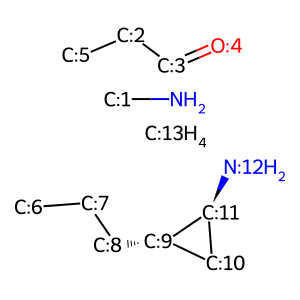

In [7]:
mol = 'NC.C(C=O)C.CCC[C@H]1C[C@@H]1N.C'
img = draw(mol)
img